
### For Q1 please consider the in lab submission. This file only contains Q2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("abalone.csv")
df.head()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
new_rings = []
for i in df["rings"]:
    if(i<=8):
        new_rings.append(0)
    elif(i == 9 or i == 10):
        new_rings.append(1)
    else :
        new_rings.append(2)
df['rings'] = new_rings

<AxesSubplot:xlabel='rings', ylabel='count'>

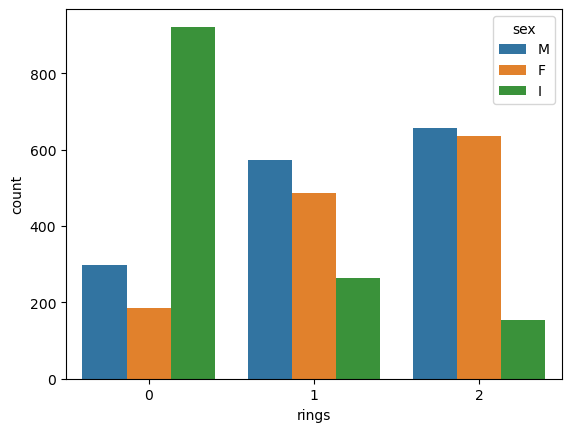

In [7]:
sns.countplot(data = df, hue = "sex", x = "rings")

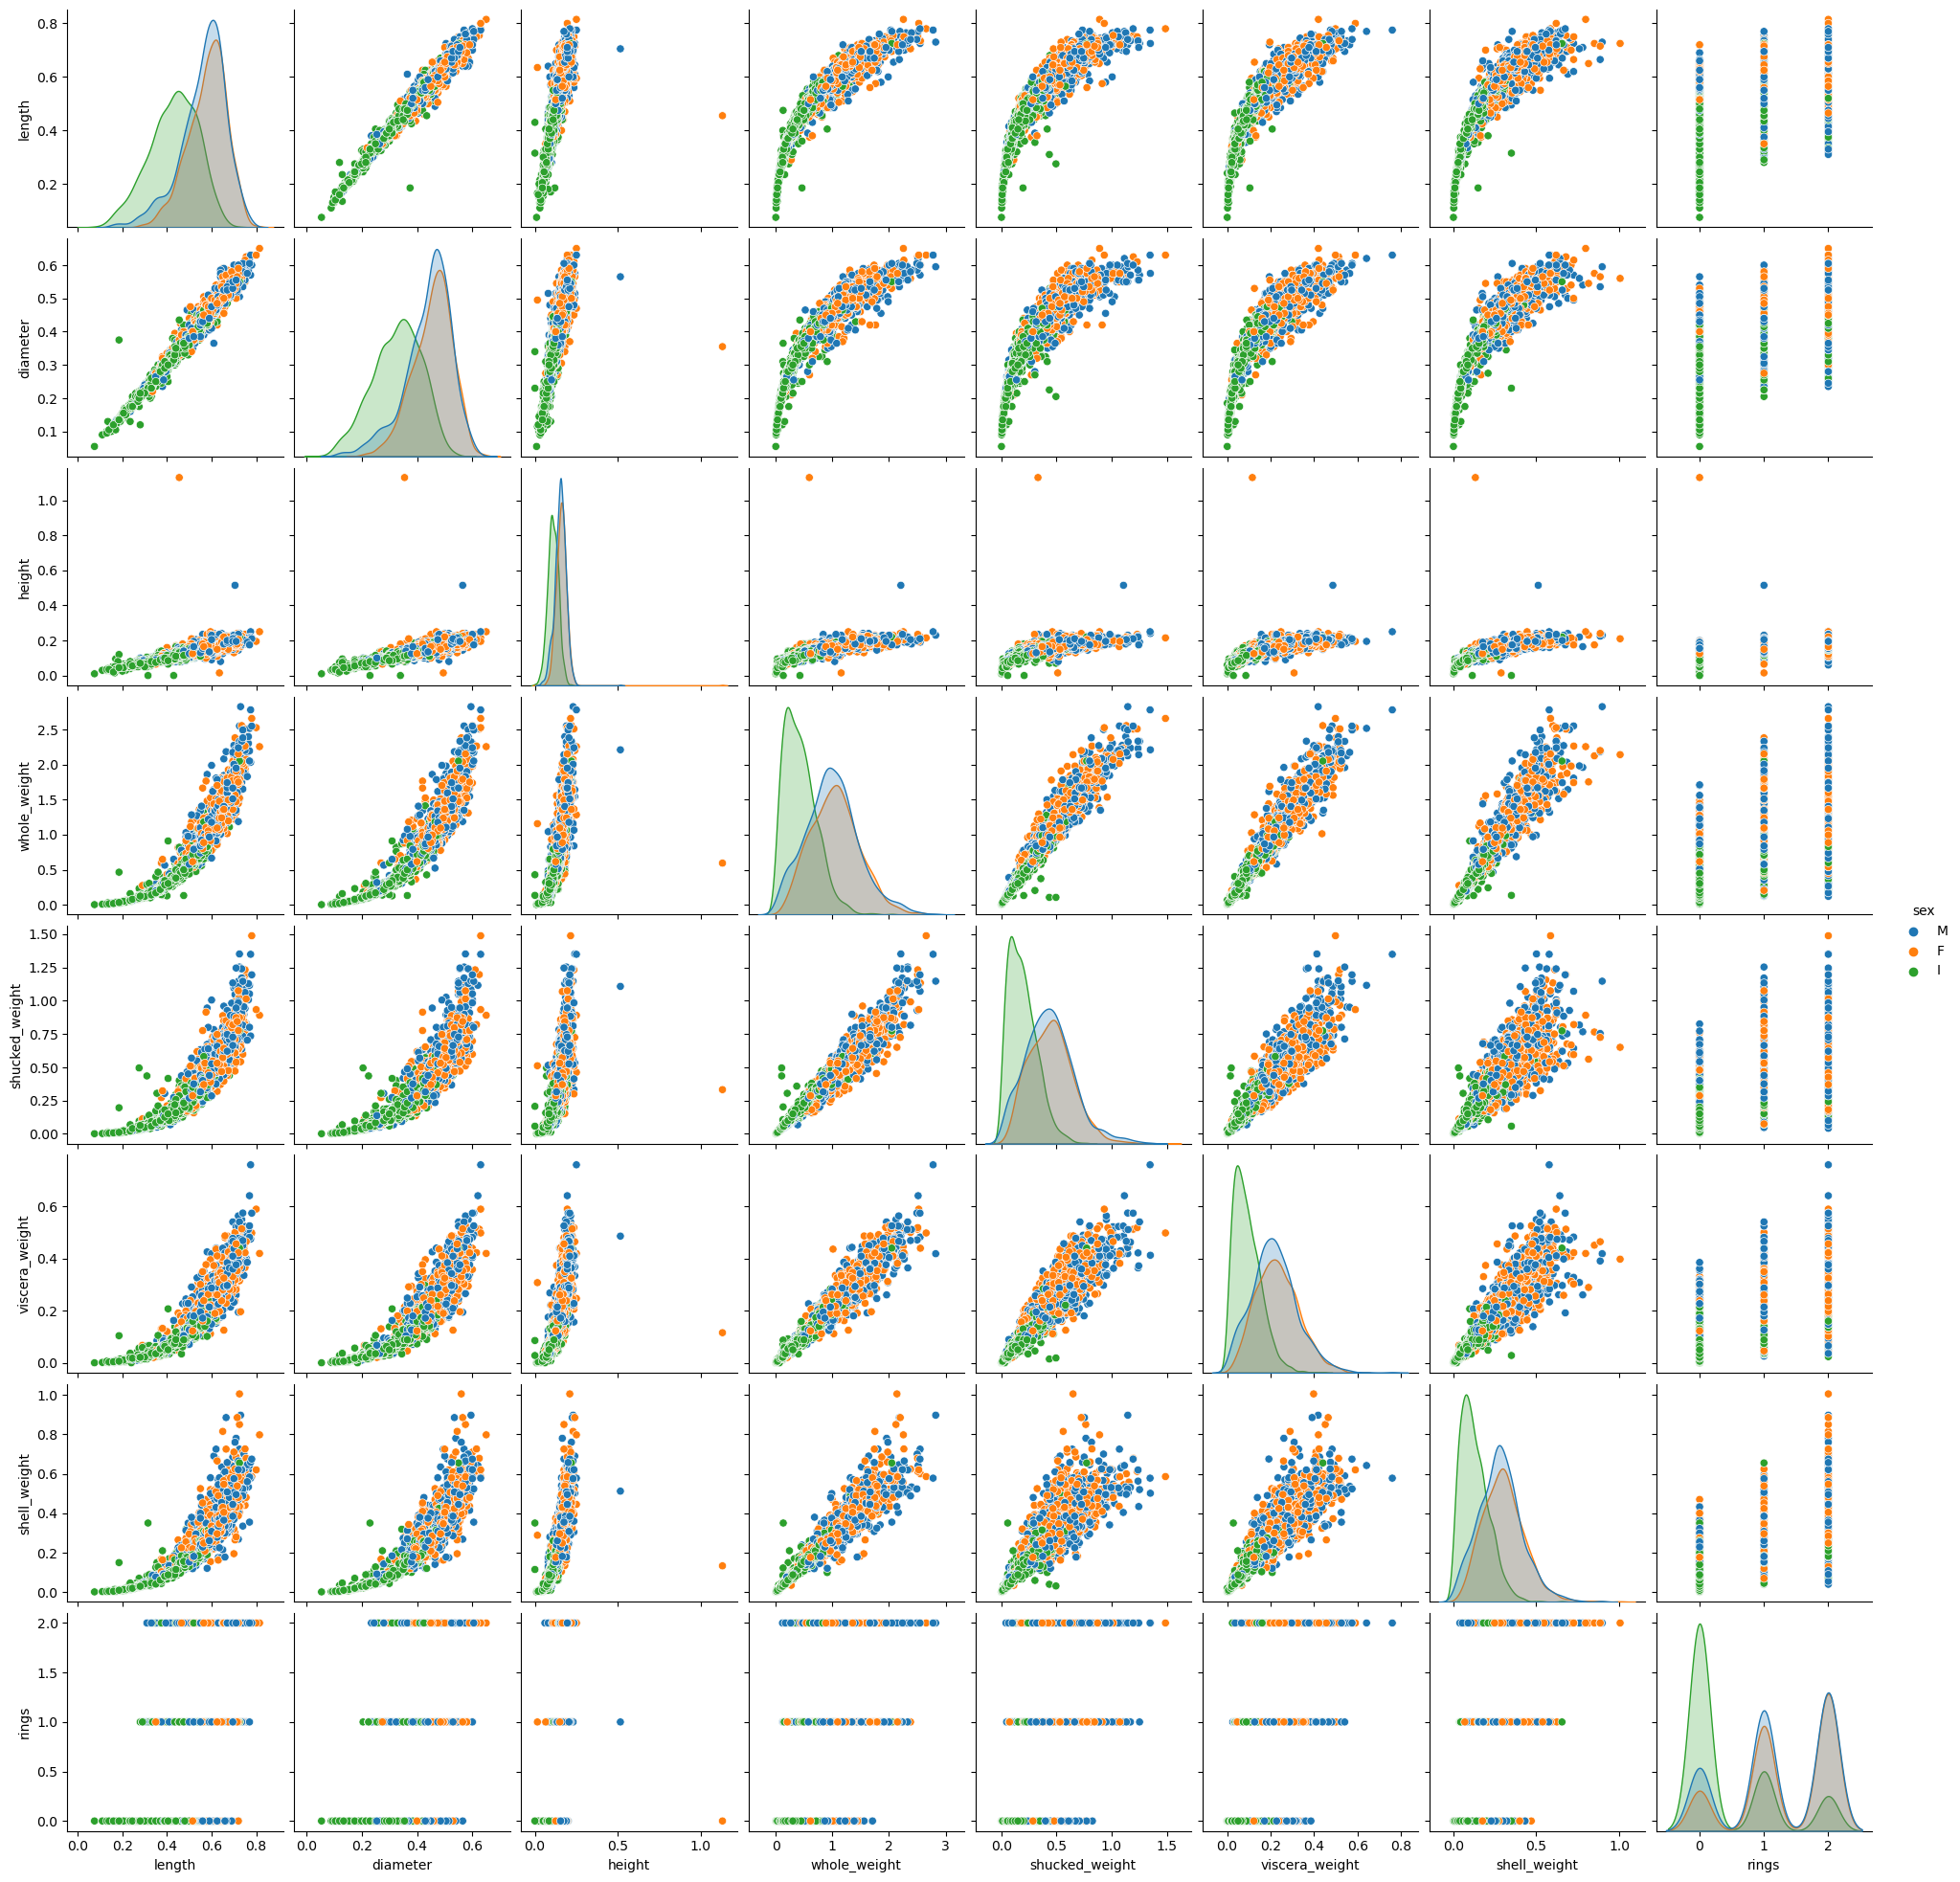

In [9]:
sns.pairplot(data=df, hue = "sex")

<AxesSubplot:>

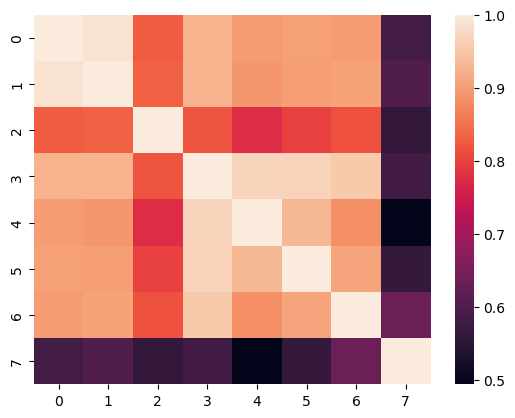

In [12]:
sns.heatmap(np.array(df.corr()))

In [13]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
sex = en.fit_transform(df[["sex"]])

In [14]:
sex_df = pd.DataFrame(sex.toarray(),columns=list(en.get_feature_names()))
df = pd.concat([sex_df, df], axis = 1)
df = df.drop("sex", axis = 1)

C:\Users\vidit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df.dtypes

x0_F              float64
x0_I              float64
x0_M              float64
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [16]:
# df = df.drop(df[(df['rings'] == 0) | (df['rings'] == 1) | (df['rings'] == 23) | (df['rings'] == 24) | (df['rings'] == 25) | (df['rings'] == 26) | (df['rings'] == 28) ].index)


X = df.drop("rings", axis = 1)
y = df[["rings"]]


In [17]:
print(df["rings"].unique())

[2 0 1]


In [18]:
df.nunique()

x0_F                 2
x0_I                 2
x0_M                 2
length             134
diameter           111
height              51
whole_weight      2429
shucked_weight    1515
viscera_weight     880
shell_weight       926
rings                3
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.87,stratify = y_train)



In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_train_encoded = y_train_encoded.toarray()
# print(x[:,0:1])


In [21]:
y_train_encoded.shape

(3341, 3)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_test = sc.transform(X_test)
X_train = sc.transform(X_train)

In [23]:
class MLP :
    def __init__(self, input_size, hidden_size, output_size,learning_rate,initialize,activation):
        self.n1 = input_size
        self.n2 = hidden_size
        self.n3 = output_size
        self.learning_rate = learning_rate
        self.initialize = initialize
        self.activation = activation
        self.initialize_trainableParameters()
    def initialize_trainableParameters(self):
        n1 = self.n1
        n2 = self.n2
        n3 = self.n3        
        if self.initialize == 'zeros' :
#             print("zeros")
            self.w1 = np.zeros((n2,n1), dtype = float)
            self.w2 = np.zeros((n3,n2), dtype = float)
            self.b1 = np.zeros((n2,1), dtype = float)
            self.b2 = np.zeros((n3,1), dtype = float)
            return 
        elif self.initialize == 'constant':
#             print("Initializing with Constant")
            self.w1 = 0.7*np.ones((n2,n1), dtype = float)
            self.w2 = 0.1*np.ones((n3,n2), dtype = float)
            self.b1 = 0.3*np.ones((n2,1), dtype = float)
            self.b2 = 0.4*np.ones((n3,1), dtype = float)
            return
        else:
            self.w1 = np.random.random((n2,n1))
            self.w2 = np.random.random((n3,n2))
            self.b1 = np.random.random((n2,1))
            self.b2 = np.random.random((n3,1))
    
    def sigmoid(self,x):
        return 1/(1 + np.exp(-1*x))
    def d_sigmoid(self,x):
        sig = self.sigmoid(x)
        return (1 - sig)*(sig) 
    def ReLu(self,x):
#         print(np.maximum(0,x).shape)
        return np.maximum(0, x)
    def d_ReLu(self,x):
        return np.where(x <= 0, 0, 1)
    def Tanh(self,x):
        return np.tanh(x)
    def d_Tanh(self,x):
        return 1 - np.tanh(x)**2
    
    def activation_f(self,x):
        if(self.activation == 'sigmoid'):
            return self.sigmoid(x)
        if(self.activation == 'ReLu'):
            return self.ReLu(x)
        if(self.activation == 'Tanh'):
            return self.Tanh(x)
    def activation_df(self,x):
        if(self.activation == 'sigmoid'):
            return self.d_sigmoid(x)
        if(self.activation == 'ReLu'):
            return self.d_ReLu(x)
        if(self.activation == 'Tanh'):
            return self.d_Tanh(x)
    
    def softmax(self,z):
        # z is the final activated outputs from the output layer, it is a array of size (class,1)
        total = np.sum(np.exp(z))
        return np.exp(z)/total
    def forward(self,input_x):
        # input_x is a row matrix i.e of size (features,1)
        input_x = input_x.T
#         print(self.w1.shape,input_x.shape,self.b1.shape)
        z1 = np.add((self.w1 @ input_x) , self.b1)
#         print(z1.shape)
        a1 = self.activation_f(z1)
#         print(self.w2.shape,a1.shape,self.b2.shape)
        z2 = np.add((self.w2 @ a1) , self.b2)
#         print(z2.shape)
        a2 = self.softmax(z2)
#         print(np.unique(a2))
        self.a1 = a1
        self.a2 = a2
        self.z1 = z1
        self.z2 = z2
#         print(a2.shape)
        return a2
    def crossEntropyerror(self,o,y_true):
        # o is a matrix having sum of all values as 1 
        # assumption - class labels are starting from zero
        e = y_true * np.log(o)
        # returns both total loss and cross ntropy loss for each output
        return e, -1*np.sum(e)

    def update_weight(self, input_x, y_true):
#       y_true should be a row matrix
        input_x = input_x.T
        a1 = self.a1 
        a2 = self.a2 
        z1 = self.z1 
        z2 = self.z2 
        w1 = self.w1
        w2 = self.w2
#         print(a2.shape,y_true.shape)
        dz2 = a2  - y_true 
        dw2 = dz2 @ a1.T
        db2 = dz2
#         print(w2.T.shape, dz2.shape, z1.shape)
        dz1 = (w2.T @ dz2) * self.activation_df(z1)
#         print(dz1.shape, input_x.T.shape)
        dw1 = dz1 @ input_x.T
        db1 = dz1 
        lr = self.learning_rate
        
        self.b1 = np.subtract(self.b1 , lr*db1)
        self.w1 = np.subtract(self.w1 , lr*dw1)
        self.w2 = np.subtract(self.w2 , lr*dw2)
        self.b2 = np.subtract(self.b2 , lr*db2)
        
        return 0
    def train_NN(self,epochs,X,y):
        for i in range(epochs):
            for ind in range(len(X)):
                self.forward(X[ind:ind+1,:])
                self.update_weight(X[ind:ind+1,:],y[ind:ind+1].T)
#             print("completed ",i)
    def predict(self,X):
        pred = []
        for ind in range(len(X)):
            input_x = X[ind:ind+1,:].T
            z1 = (self.w1 @ input_x) + self.b1
            a1 = self.activation_f(z1)
            z2 = (self.w2 @ a1) + self.b2
            a2 = self.softmax(z2)
            pred.append((np.argmax(a2)))
        return pred

In [24]:
#y_true and input_x should be a row matrix
classes = 3
model = MLP(X_train.shape[1], 30, classes, 0.01,'zeros','ReLu')
model.train_NN(10, np.array(X_train), y_train_encoded)

In [25]:
pred = model.predict(np.array(X_test))

In [26]:
np.unique(pred)

array([0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,np.array(pred))*100)

33.61244019138756


In [28]:
fitted = model.predict(np.array(X_train))
print(accuracy_score(fitted, y_train)*100)

33.702484286141875


In [29]:
activations = ["ReLu", "Tanh", "sigmoid"]
initializers = ["zeros","constant","random"]




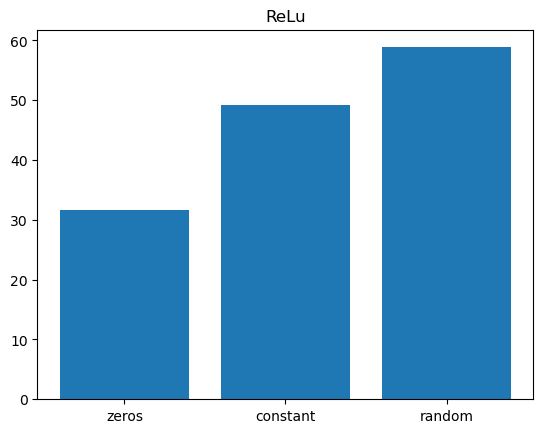

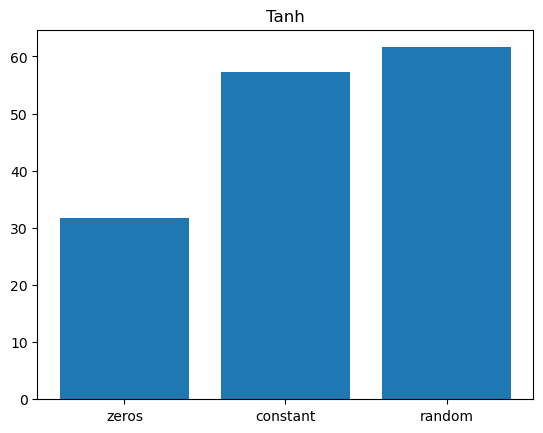

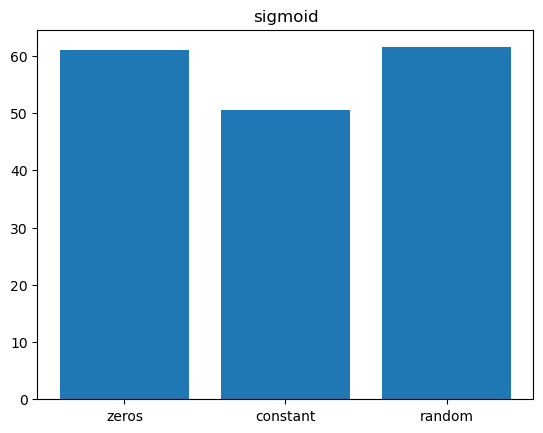

In [30]:
for j in range(1,4):
    a = activations[j-1]
    acc = []
    for i in range(1,4):
        classes = 3
        model = MLP(X_train.shape[1], 20, classes, 0.1, initializers[i-1], a)
        model.train_NN(1, np.array(X_train), y_train_encoded)
        pred = model.predict(np.array(X_test))
        acc.append(accuracy_score(y_test,np.array(pred))*100)
    plt.bar(x = initializers, height = acc)
    plt.title(a)
    plt.show()


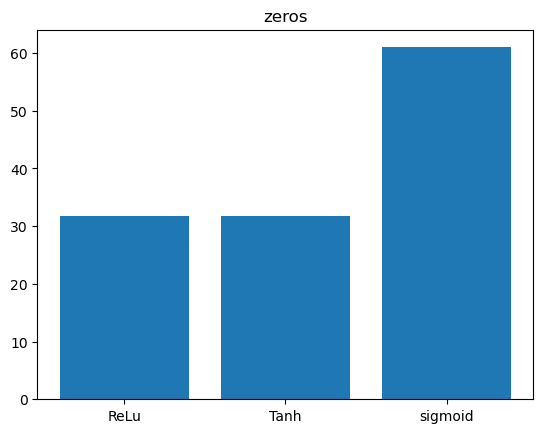

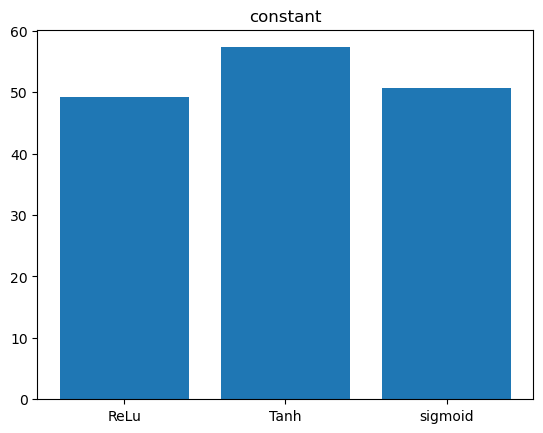

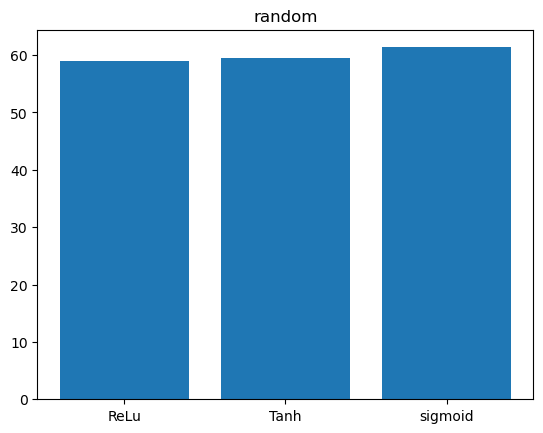

In [31]:
for j in range(1,4):
    acc = []
    initializer = initializers[j-1]
    for i in range(1,4):
        a = activations[i-1]
        classes = 3
        model = MLP(X_train.shape[1], 20, classes, 0.1, initializer, a)
        model.train_NN(1, np.array(X_train), y_train_encoded)
        pred = model.predict(np.array(X_test))
        acc.append(accuracy_score(y_test,np.array(pred))*100)
    plt.bar(x = activations, height = acc)
    plt.title(initializer)
    plt.show()

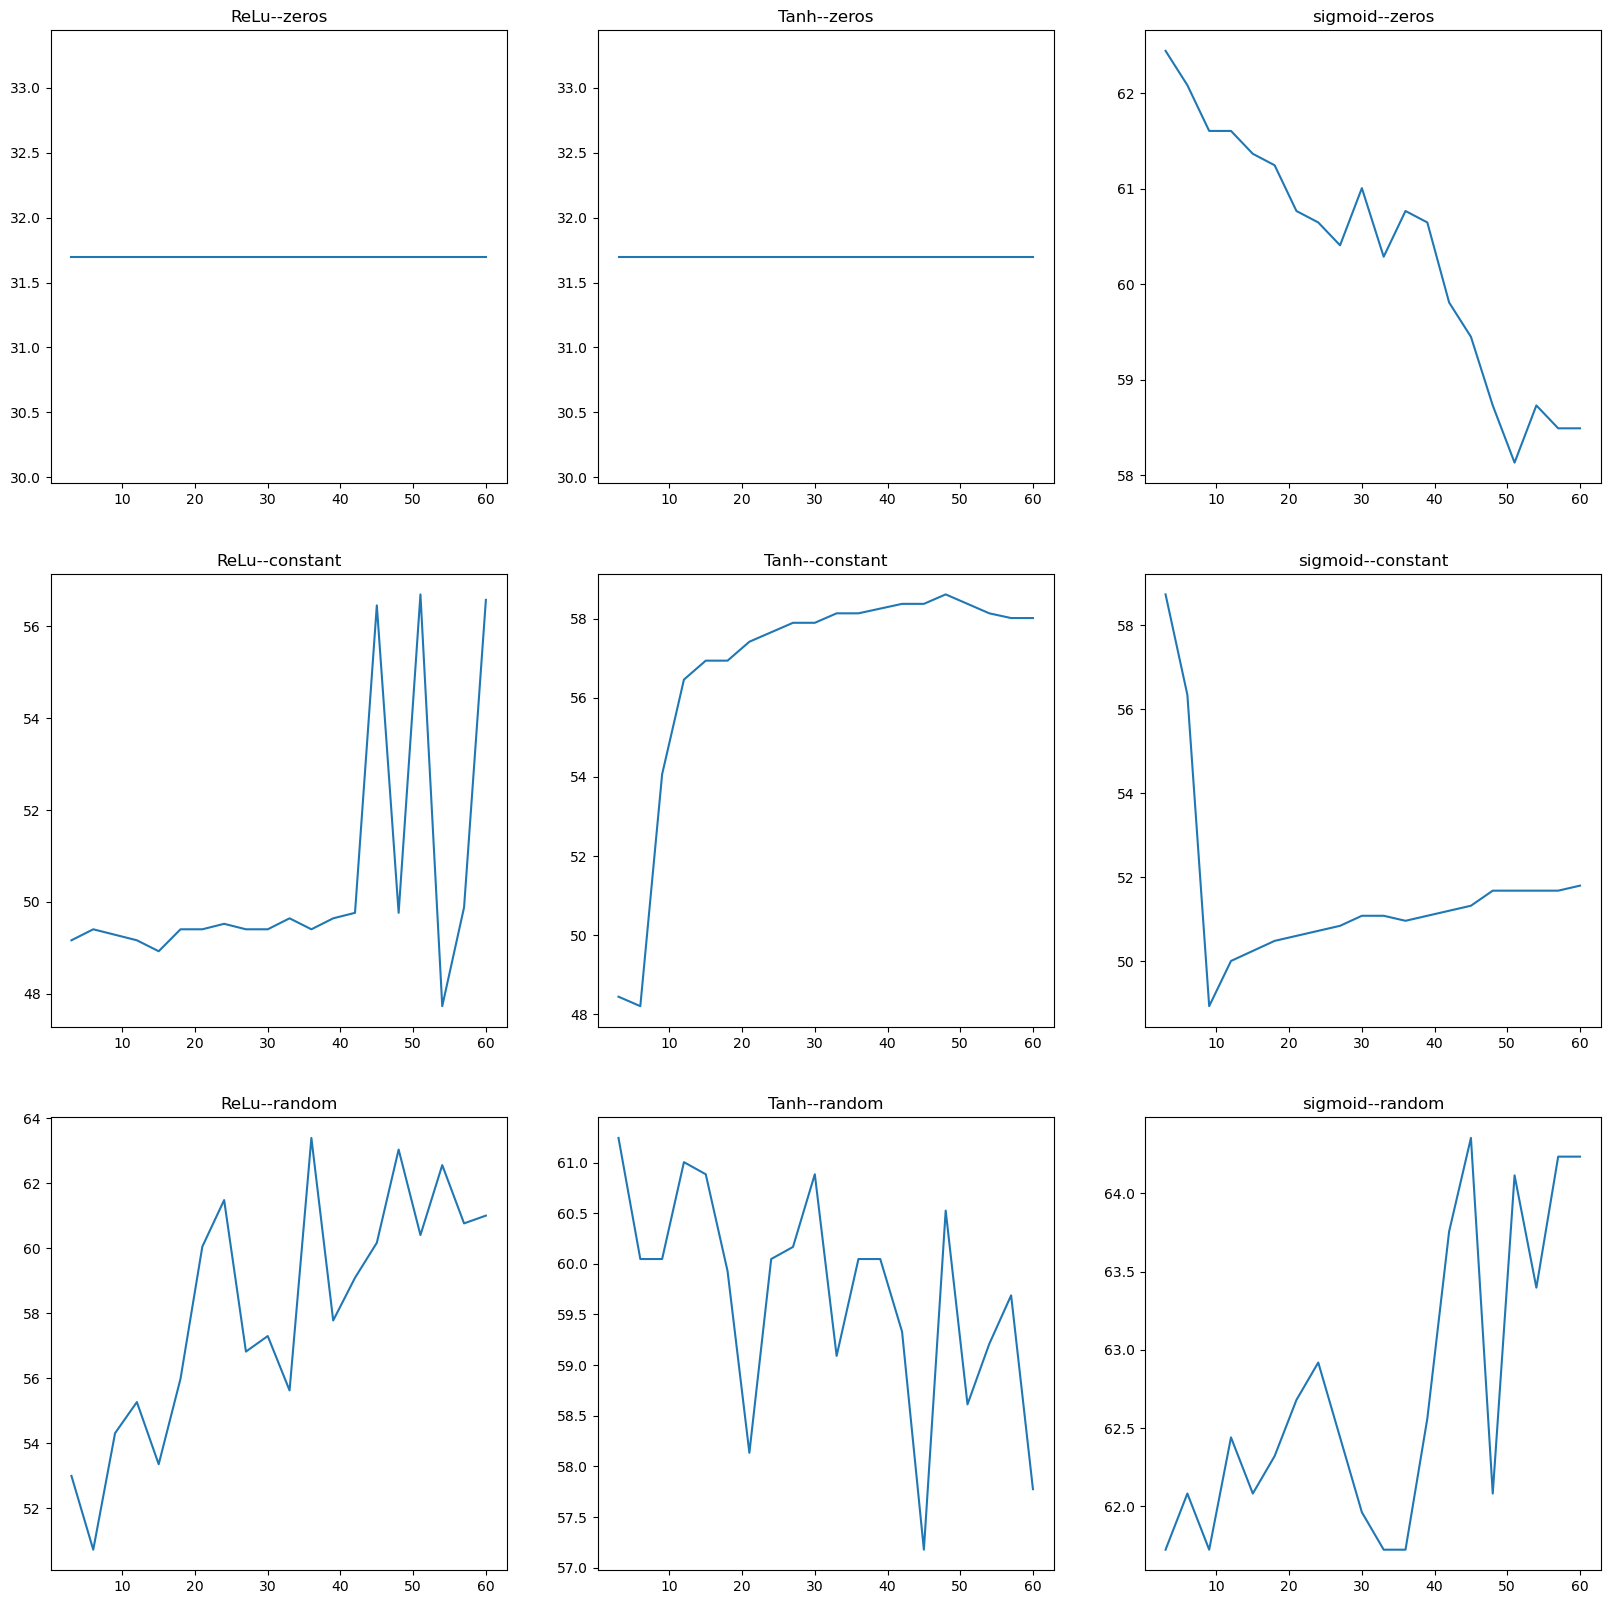

In [33]:
i = 1
plt.figure(figsize = (20,20))
for initializer in initializers: 
    for a in activations:
        acc = []
        n = []
        for nodes in range(1,21):
            n.append(nodes*3)
            classes = 3
            model = MLP(X_train.shape[1],nodes*3 , classes, 0.1, initializer, a)
            model.train_NN(1, np.array(X_train), y_train_encoded)
            pred = model.predict(np.array(X_test))
            acc.append(accuracy_score(y_test,np.array(pred))*100)    
        plt.subplot(3,3,i)
        plt.plot(n,acc,label = a + "--" + initializer)
        plt.title( a + "--" + initializer)
        i += 1
        
# plt.legend()
# plt.show()
        